In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('./titanic.zip',usecols=['Survived','Age','Fare'])

In [16]:
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [17]:
df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [18]:
x = df.drop(['Survived'],axis = 1)

In [19]:
y = df['Survived']

In [20]:
import sklearn

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [23]:
len(x_train),len(y_train)

(280, 280)

In [24]:
len(x_test),len(y_test)

(138, 138)

# end of distribution

In [26]:
import warnings
warnings.filterwarnings('ignore')

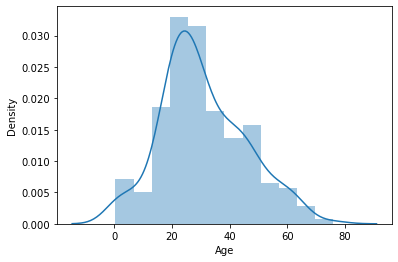

In [27]:
sns.distplot(x_train['Age'])
plt.show()

In [29]:
x_train['Age'].isnull().sum()

59

In [31]:
c = x_train['Age'].mean()+3*x_train['Age'].std()


In [32]:
c

74.97527993501252

In [33]:
x_train['Age_replaced']= x_train['Age'].fillna(c)

In [35]:
x_train

,Age,Fare,Age_replaced
109,18.5,13.0000,18.50000
176,20.0,36.7500,20.00000
366,NaN,14.4583,74.97528
407,50.0,211.5000,50.00000
280,23.0,8.6625,23.00000
...,...,...,...
71,21.0,7.8958,21.00000
106,21.0,7.8208,21.00000
270,46.0,75.2417,46.00000
348,24.0,13.5000,24.00000


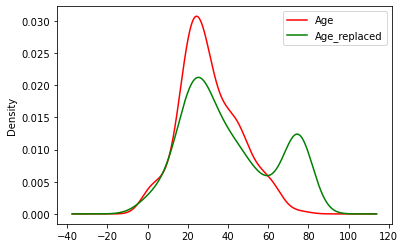

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x_train['Age'].plot(kind='kde',color='r',ax=ax,label= 'Age')
x_train['Age_replaced'].plot(kind='kde',color='g',ax=ax,label= 'Age_replaced')
plt.legend(loc=0)
plt.show()


In [37]:
# for the test

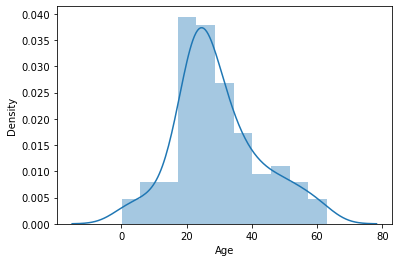

In [38]:
sns.distplot(x_test['Age'])
plt.show()

In [39]:
x_test['Age'].isnull().sum()

27

In [41]:
x_test['Age_replaced']=x_test['Age'].fillna(c)

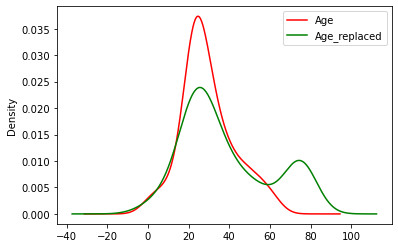

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x_test['Age'].plot(kind='kde',color='r',ax=ax,label= 'Age')
x_test['Age_replaced'].plot(kind='kde',color='g',ax=ax,label= 'Age_replaced')
plt.legend(loc=0)
plt.show()



# fare

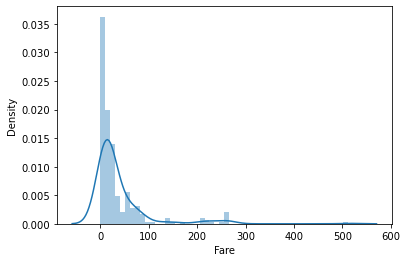

In [43]:
sns.distplot(x_train['Fare'])
plt.show()

In [47]:
x_test['Fare'].isnull().sum()

1

In [46]:
df['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [50]:
IQR = x_test['Fare'].quantile(0.75)-x_test['Fare'].quantile(0.25)

In [51]:
IQR

19.8542

In [52]:
B=x_test['Fare'].quantile(0.75)+1.5*IQR

In [53]:
B

57.5313

In [54]:
x_test['Fare_replaced']=x_test['Fare'].fillna(B)

In [55]:
x_test

,Age,Fare,Age_replaced,Fare_replaced
321,25.0,7.2292,25.00000,7.2292
324,39.0,211.3375,39.00000,211.3375
388,21.0,7.7500,21.00000,7.7500
56,35.0,7.8958,35.00000,7.8958
153,36.0,12.1833,36.00000,12.1833
...,...,...,...,...
371,31.0,134.5000,31.00000,134.5000
399,31.0,7.7333,31.00000,7.7333
272,26.0,136.7792,26.00000,136.7792
400,30.0,164.8667,30.00000,164.8667


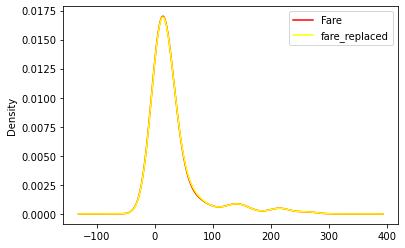

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x_test['Fare'].plot(kind='kde',color='r',ax=ax,label= 'Fare')
x_test['Fare_replaced'].plot(kind='kde',color='yellow',ax=ax,label= 'fare_replaced')
plt.legend(loc=0)
plt.show()

